___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [124]:
from pandas_datareader import data, wb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [108]:

bank_stocks = data.DataReader(["BAC","C",'GS','JPM','MS','WFC'], 'yahoo', start = '01-01-2006', end = '01-01-2016')
bank_stocks

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  35.523922  448.516144  108.233147  27.994356  38.006454   
2006-01-04  35.146645  440.235657  106.738167  27.832783  38.032536   
2006-01-05  35.191933  442.419647  106.696220  27.917086  38.136818   
2006-01-06  35.139107  442.419647  108.207947  28.113771  38.175922   
2006-01-09  35.161732  440.326721  109.509758  28.570408  38.580029   
...               ...         ...         ...        ...        ...   
2015-12-24  16.071533   48.970203  171.495453  59.617184  29.565275   
2015-12-28  15.941246   48.663620  170.696548  59.420250  29.283098   
2015-12-29  16.080839   49.221058  172.491684  60.037918  29.628998   
2015-12-30  15.866797   48.589291  171.063080  59.608227  29.337711   
2015-12-31  15.662066   48.078304  169.390152  59.106956  28.955408   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  21.045347  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.801256  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.778162  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.900213  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.896914  46.599998  483.899994  130.389999  40.669998  ...   
...               ...        ...         ...         ...        ...  ...   
2015-12-24  48.245335  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28  48.122128  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29  48.658970  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30  48.306938  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31  47.840500  16.830000   51.750000  180.229996  66.029999  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24  182.270004  66.620003  32.570000  54.970001  29369400.0   
2015-12-28  181.770004  66.290001  32.360001  54.549999  41777500.0   
2015-12-29  182.820007  66.839996  32.439999  55.110001  45670400.0   
2015-12-30  183.279999  67.040001  32.500000  55.270000  35066400.0   
2015-12-31  181.160004  66.190002  31.910000  54.509998  47153000.0   

Attributes                                                            
Symbols              C         GS         JPM         MS         WFC  
Date                                                                  
2006-01-03   1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04   1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05   1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06   1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09   1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  
...                ...        ...         ...        ...         ...  
2015-12-24   4671200.0  1107600.0   4468200.0  2798200.0   4999400.0  
2015-12-28   8761700.0  1723300.0   6610600.0  5420300.0   8288800.0  
2015-12-29  10155100.0  1848900.0   9820800.0  6388200.0   7894900.0  
2015-12-30   8763300.0  1514300.0   7190700.0  5057200.0   8016900.0  
2015-12-31  11281800.0

In [109]:
bank_stocks.xs(axis=1,key = 'Close')
bank_stocks.xs(axis=1,key = 'C',level='Symbols')
bank_stocks.xs(axis=1,key = 'Open',level='Attributes')


Symbols           BAC           C          GS        JPM         MS        WFC
Date                                                                          
2006-01-03  46.919998  490.000000  126.699997  39.830002  57.169998  31.600000
2006-01-04  47.000000  488.600006  127.349998  39.779999  58.700001  31.799999
2006-01-05  46.580002  484.399994  126.000000  39.610001  58.549999  31.500000
2006-01-06  46.799999  488.799988  127.290001  39.919998  58.770000  31.580000
2006-01-09  46.720001  486.000000  128.500000  39.880001  58.630001  31.674999
...               ...         ...         ...        ...        ...        ...
2015-12-24  17.320000   52.480000  182.270004  66.620003  32.570000  54.970001
2015-12-28  17.219999   52.570000  181.770004  66.290001  32.360001  54.549999
2015-12-29  17.250000   52.759998  182.820007  66.839996  32.439999  55.110001
2015-12-30  17.200001   52.840000  183.279999  67.040001  32.500000  55.270000
2015-12-31  17.010000   52.070000  181.160004  66.190002  31.910000  54.509998

[2517 rows x 6 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

** Set the column name levels (this is filled out for you):**

In [110]:
bank_stocks.columns.names = ['Stock Info', 'Bank Ticker']
bank_stocks

Stock Info   Adj Close                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   35.523922  448.516144  108.233147  27.994356  38.006454   
2006-01-04   35.146645  440.235657  106.738167  27.832783  38.032536   
2006-01-05   35.191933  442.419647  106.696220  27.917086  38.136818   
2006-01-06   35.139107  442.419647  108.207947  28.113771  38.175922   
2006-01-09   35.161732  440.326721  109.509758  28.570408  38.580029   
...                ...         ...         ...        ...        ...   
2015-12-24   16.071533   48.970203  171.495453  59.617184  29.565275   
2015-12-28   15.941246   48.663620  170.696548  59.420250  29.283098   
2015-12-29   16.080839   49.221058  172.491684  60.037918  29.628998   
2015-12-30   15.866797   48.589291  171.063080  59.608227  29.337711   
2015-12-31   15.662066   48.078304  169.390152  59.106956  28.955408   

Stock Info                  Close                                     ...  \
Bank Ticker        WFC        BAC           C          GS        JPM  ...   
Date                                                                  ...   
2006-01-03   21.045347  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04   20.801256  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05   20.778162  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06   20.900213  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09   20.896914  46.599998  483.899994  130.389999  40.669998  ...   
...                ...        ...         ...         ...        ...  ...   
2015-12-24   48.245335  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28   48.122128  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29   48.658970  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30   48.306938  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31   47.840500  16.830000   51.750000  180.229996  66.029999  ...   

Stock Info         Open                                       Volume  \
Bank Ticker          GS        JPM         MS        WFC         BAC   
Date                                                                   
2006-01-03   126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04   127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05   126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06   127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09   128.500000  39.880001  58.630001  31.674999  15619400.0   
...                 ...        ...        ...        ...         ...   
2015-12-24   182.270004  66.620003  32.570000  54.970001  29369400.0   
2015-12-28   181.770004  66.290001  32.360001  54.549999  41777500.0   
2015-12-29   182.820007  66.839996  32.439999  55.110001  45670400.0   
2015-12-30   183.279999  67.040001  32.500000  55.270000  35066400.0   
2015-12-31   181.160004  66.190002  31.910000  54.509998  47153000.0   

Stock Info                                                             
Bank Ticker           C         GS         JPM         MS         WFC  
Date                                                                   
2006-01-03    1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04    1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05    1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06    1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09    1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  
...                 ...        ...         ...        ...         ...  
2015-12-24    4671200.0  1107600.0   4468200.0  2798200.0   4999400.0  
2015-12-28    8761700.0  1723300.0   6610600.0  5420300.0   8288800.0  
2015-12-29   10155100.0  1848900.0   9820800.0  6388200.0   7894900.0  
2015-12-30    8763300.0  1514300.0   71

** Check the head of the bank_stocks dataframe.**

In [111]:
bank_stocks.head()

Stock Info   Adj Close                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   35.523922  448.516144  108.233147  27.994356  38.006454   
2006-01-04   35.146645  440.235657  106.738167  27.832783  38.032536   
2006-01-05   35.191933  442.419647  106.696220  27.917086  38.136818   
2006-01-06   35.139107  442.419647  108.207947  28.113771  38.175922   
2006-01-09   35.161732  440.326721  109.509758  28.570408  38.580029   

Stock Info                  Close                                     ...  \
Bank Ticker        WFC        BAC           C          GS        JPM  ...   
Date                                                                  ...   
2006-01-03   21.045347  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04   20.801256  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05   20.778162  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06   20.900213  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09   20.896914  46.599998  483.899994  130.389999  40.669998  ...   

Stock Info         Open                                       Volume  \
Bank Ticker          GS        JPM         MS        WFC         BAC   
Date                                                                   
2006-01-03   126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04   127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05   126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06   127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09   128.500000  39.880001  58.630001  31.674999  15619400.0   

Stock Info                                                            
Bank Ticker          C         GS         JPM         MS         WFC  
Date                                                                  
2006-01-03   1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04   1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05   1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06   1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09   1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [112]:
bank_stocks.xs(axis=1, level='Stock Info', key='Close').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [165]:
l = len(bank_stocks.xs(axis=1, level="Bank Ticker", key='C')['Open'])

returns = bank_stocks.copy()

for i in range(0,l):
    returns.iloc[i] = bank_stocks.iloc[i]/bank_stocks.iloc[i-1] - 1

# returns.iloc[0] = 'NaN'
returns

Stock Info  Adj Close                                                    \
Bank Ticker       BAC         C        GS       JPM        MS       WFC   
Date                                                                      
2006-01-03   1.268151  8.328868 -0.361042 -0.526378  0.312586 -0.560093   
2006-01-04  -0.010620 -0.018462 -0.013813 -0.005772  0.000686 -0.011598   
2006-01-05   0.001289  0.004961 -0.000393  0.003029  0.002742 -0.001110   
2006-01-06  -0.001501  0.000000  0.014169  0.007045  0.001025  0.005874   
2006-01-09   0.000644 -0.004731  0.012031  0.016242  0.010585 -0.000158   
...               ...       ...       ...       ...       ...       ...   
2015-12-24  -0.004037  0.001520 -0.002624 -0.001948 -0.003681 -0.003997   
2015-12-28  -0.008107 -0.006261 -0.004658 -0.003303 -0.009544 -0.002554   
2015-12-29   0.008757  0.011455  0.010517  0.010395  0.011812  0.011156   
2015-12-30  -0.013310 -0.012835 -0.008282 -0.007157 -0.009831 -0.007235   
2015-12-31  -0.012903 -0.010516 -0.009780 -0.008409 -0.013031 -0.009656   

Stock Info      Close                                ...      Open            \
Bank Ticker       BAC         C        GS       JPM  ...        GS       JPM   
Date                                                 ...                       
2006-01-03   1.797386  8.524638 -0.284969 -0.391337  ... -0.300618 -0.398247   
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  ...  0.005130 -0.001255   
2006-01-05   0.001288  0.004961 -0.000393  0.003029  ... -0.010601 -0.004273   
2006-01-06  -0.001501  0.000000  0.014169  0.007046  ...  0.010238  0.007826   
2006-01-09   0.000644 -0.004731  0.012030  0.016242  ...  0.009506 -0.001002   
...               ...       ...       ...       ...  ...       ...       ...   
2015-12-24  -0.004037  0.001520 -0.002624 -0.001948  ...  0.008688  0.007562   
2015-12-28  -0.008107 -0.006261 -0.004658 -0.003303  ... -0.002743 -0.004953   
2015-12-29   0.008757  0.011455  0.010516  0.010395  ...  0.005777  0.008297   
2015-12-30  -0.013310 -0.012835 -0.008282 -0.007157  ...  0.002516  0.002992   
2015-12-31  -0.012903 -0.010516 -0.009780 -0.008410  ... -0.011567 -0.012679   

Stock Info                         Volume                                \
Bank Ticker        MS       WFC       BAC         C        GS       JPM   
Date                                                                      
2006-01-03   0.791601 -0.420290 -0.654387 -0.863710  2.488754 -0.123902   
2006-01-04   0.026762  0.006329  0.089662  0.216766 -0.214439  0.050854   
2006-01-05  -0.002555 -0.009434 -0.156955 -0.389011 -0.235355 -0.398925   
2006-01-06   0.003757  0.002540 -0.158369  0.198670  0.161995 -0.017572   
2006-01-09  -0.002382  0.003008  0.239655  0.226609  0.093504  1.080508   
...               ...       ...       ...       ...       ...       ...   
2015-12-24   0.003080  0.006777 -0.553458 -0.687549 -0.532244 -0.643243   
2015-12-28  -0.006448 -0.007641  0.422484  0.875685  0.555887  0.479477   
2015-12-29   0.002472  0.010266  0.093182  0.159033  0.072883  0.485614   
2015-12-30   0.001850  0.002903 -0.232185 -0.137054 -0.180972 -0.267809   
2015-12-31  -0.018154 -0.013751  0.344678  0.287392  0.171432  1.037952   

Stock Info                       
Bank Ticker        MS       WFC  
Date                             
2006-01-03  -0.340593  0.007923  
2006-01-04   0.483690 -0.013289  
2006-01-05  -0.275740 -0.065501  
2006-01-06   0.192420 -0.172691  
2006-01-09  -0.398459 -0.331303  
...               ...       ...  
2015-12-24  -0.588929 -0.616422  
2015-12-28   0.937067  0.657959  
2015-12-29   0.178569 -0.047522  
2015-12-30  -0.208353  0.015453  
2015-12-31   0.612414  0.363345  

[2517 rows x 36 columns]

In [167]:
bank_stocks

Stock Info   Adj Close                                                \
Bank Ticker        BAC           C          GS        JPM         MS   
Date                                                                   
2006-01-03   35.523922  448.516144  108.233147  27.994356  38.006454   
2006-01-04   35.146645  440.235657  106.738167  27.832783  38.032536   
2006-01-05   35.191933  442.419647  106.696220  27.917086  38.136818   
2006-01-06   35.139107  442.419647  108.207947  28.113771  38.175922   
2006-01-09   35.161732  440.326721  109.509758  28.570408  38.580029   
...                ...         ...         ...        ...        ...   
2015-12-24   16.071533   48.970203  171.495453  59.617184  29.565275   
2015-12-28   15.941246   48.663620  170.696548  59.420250  29.283098   
2015-12-29   16.080839   49.221058  172.491684  60.037918  29.628998   
2015-12-30   15.866797   48.589291  171.063080  59.608227  29.337711   
2015-12-31   15.662066   48.078304  169.390152  59.106956  28.955408   

Stock Info                  Close                                     ...  \
Bank Ticker        WFC        BAC           C          GS        JPM  ...   
Date                                                                  ...   
2006-01-03   21.045347  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04   20.801256  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05   20.778162  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06   20.900213  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09   20.896914  46.599998  483.899994  130.389999  40.669998  ...   
...                ...        ...         ...         ...        ...  ...   
2015-12-24   48.245335  17.270000   52.709999  182.470001  66.599998  ...   
2015-12-28   48.122128  17.129999   52.380001  181.619995  66.379997  ...   
2015-12-29   48.658970  17.280001   52.980000  183.529999  67.070000  ...   
2015-12-30   48.306938  17.049999   52.299999  182.009995  66.589996  ...   
2015-12-31   47.840500  16.830000   51.750000  180.229996  66.029999  ...   

Stock Info         Open                                       Volume  \
Bank Ticker          GS        JPM         MS        WFC         BAC   
Date                                                                   
2006-01-03   126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04   127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05   126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06   127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09   128.500000  39.880001  58.630001  31.674999  15619400.0   
...                 ...        ...        ...        ...         ...   
2015-12-24   182.270004  66.620003  32.570000  54.970001  29369400.0   
2015-12-28   181.770004  66.290001  32.360001  54.549999  41777500.0   
2015-12-29   182.820007  66.839996  32.439999  55.110001  45670400.0   
2015-12-30   183.279999  67.040001  32.500000  55.270000  35066400.0   
2015-12-31   181.160004  66.190002  31.910000  54.509998  47153000.0   

Stock Info                                                             
Bank Ticker           C         GS         JPM         MS         WFC  
Date                                                                   
2006-01-03    1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04    1870900.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05    1143100.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06    1370200.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09    1680700.0  4723500.0  16575200.0  4144500.0   5619600.0  
...                 ...        ...         ...        ...         ...  
2015-12-24    4671200.0  1107600.0   4468200.0  2798200.0   4999400.0  
2015-12-28    8761700.0  1723300.0   6610600.0  5420300.0   8288800.0  
2015-12-29   10155100.0  1848900.0   9820800.0  6388200.0   7894900.0  
2015-12-30    8763300.0  1514300.0   71

In [168]:
returns.xs(axis = 1, key = 'Close', level = 'Stock Info')

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03   1.797386  8.524638 -0.284969 -0.391337  0.833071 -0.413171
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158
...               ...       ...       ...       ...       ...       ...
2015-12-24  -0.004037  0.001520 -0.002624 -0.001948 -0.003681 -0.003997
2015-12-28  -0.008107 -0.006261 -0.004658 -0.003303 -0.009544 -0.002554
2015-12-29   0.008757  0.011455  0.010516  0.010395  0.011812  0.011156
2015-12-30  -0.013310 -0.012835 -0.008282 -0.007157 -0.009831 -0.007235
2015-12-31  -0.012903 -0.010516 -0.009780 -0.008410 -0.013031 -0.009656

[2517 rows x 6 columns]

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [169]:
returns_close = returns.xs(axis = 1, key = 'Close', level = 'Stock Info')
# returns_close = returns_close.reset_index()
returns_close.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03   1.797386  8.524638 -0.284969 -0.391337  0.833071 -0.413171
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158

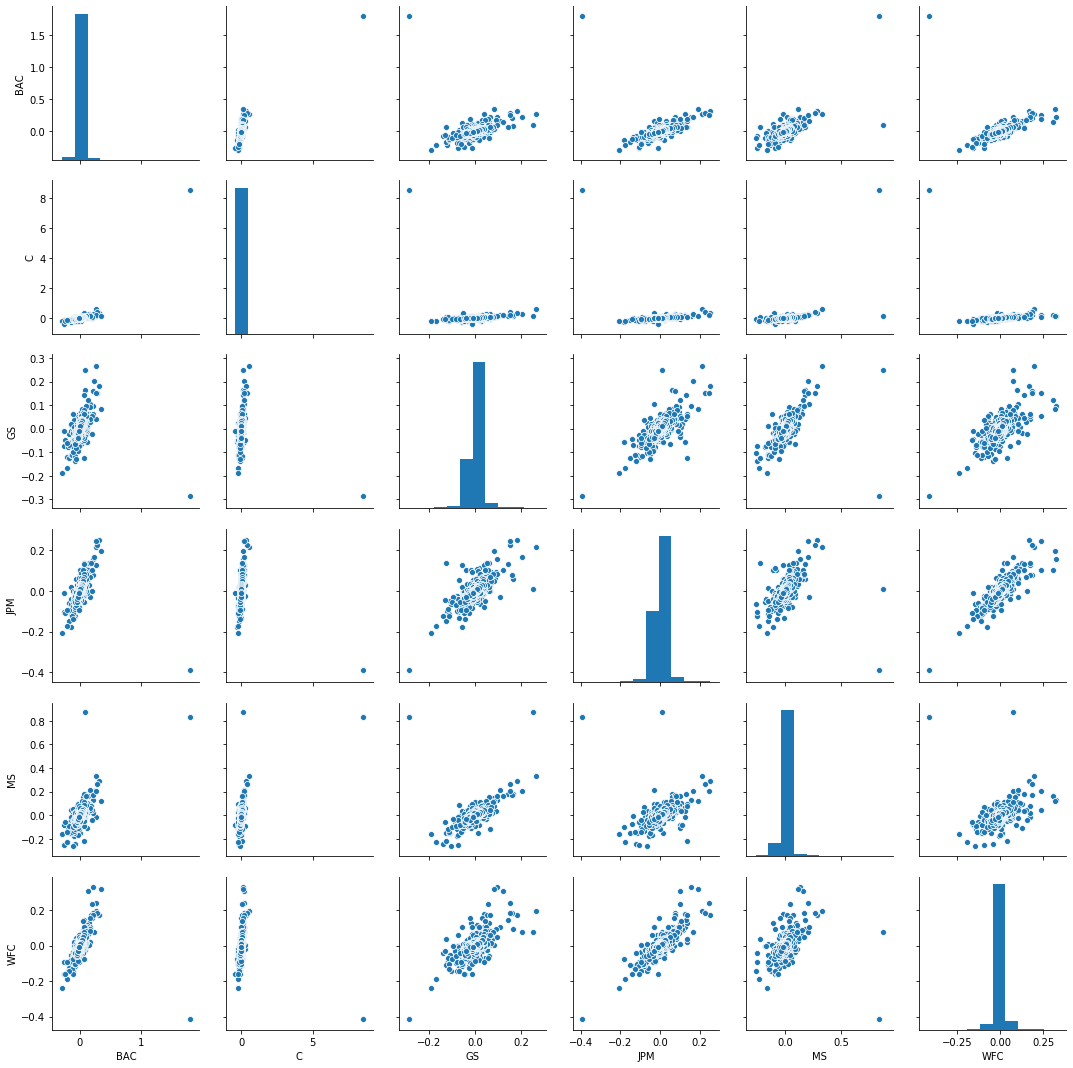

In [170]:
sns.pairplot(returns_close)

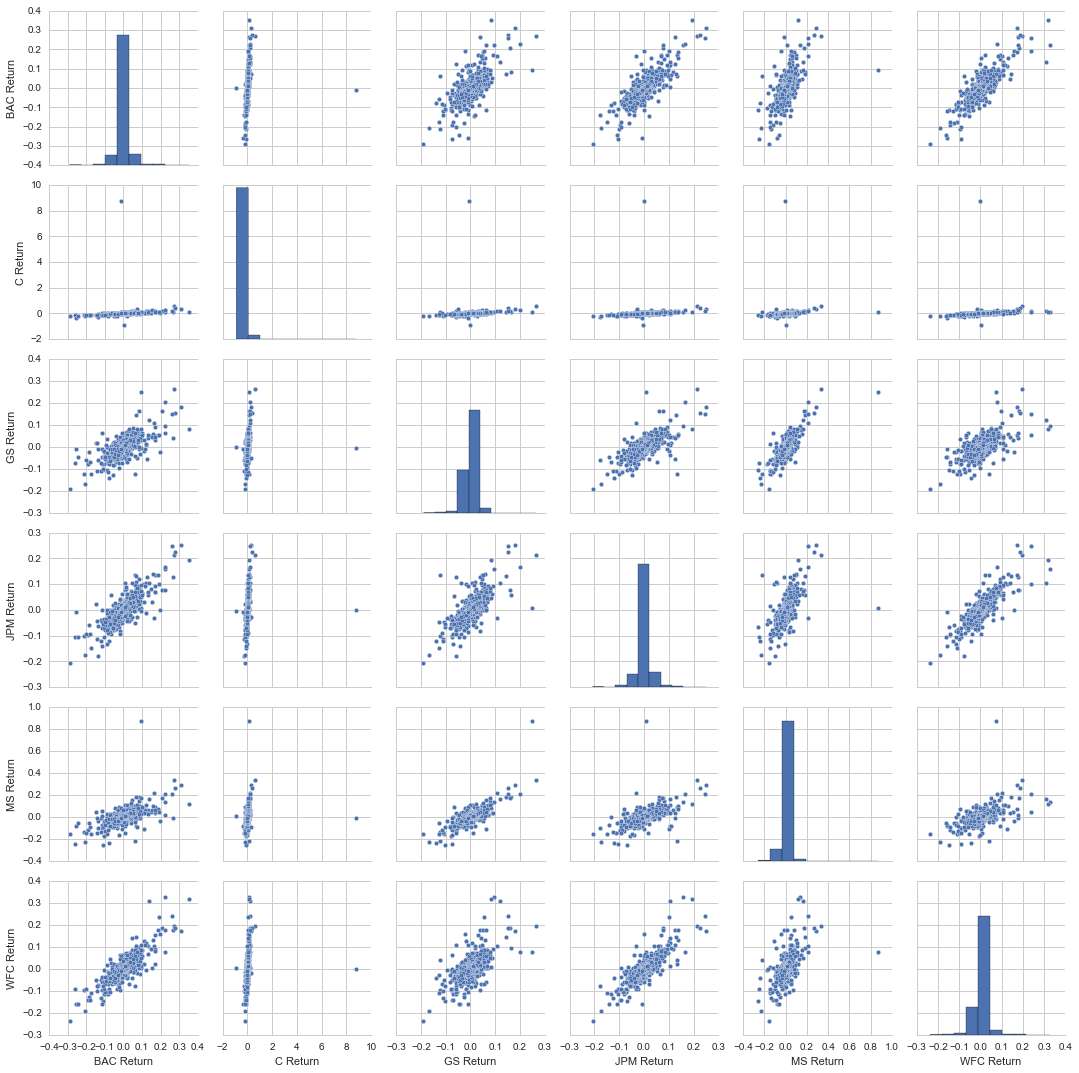

* See solution for details about Citigroup behavior....

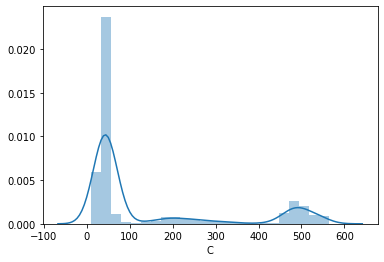

In [175]:
sns.distplot(bank_stocks.xs(axis = 1, key = 'Close')['C'])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [248]:
returns_close[returns_close == returns_close.max()].dropna(how = 'all')

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03   1.797386  8.524638       NaN       NaN       NaN       NaN
2008-07-16        NaN       NaN       NaN       NaN       NaN  0.327645
2008-10-13        NaN       NaN       NaN       NaN  0.869835       NaN
2008-11-24        NaN       NaN  0.264678       NaN       NaN       NaN
2009-01-21        NaN       NaN       NaN  0.250967       NaN       NaN

In [260]:
returns_close.idxmax(axis=0)

Bank Ticker
BAC   2006-01-03
C     2006-01-03
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

In [261]:
returns_close.idxmin(axis= 0)

Bank Ticker
BAC   2009-01-20
C     2009-02-27
GS    2006-01-03
JPM   2006-01-03
MS    2008-10-09
WFC   2006-01-03
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [263]:
returns_close.head()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Date                                                                   
2006-01-03   1.797386  8.524638 -0.284969 -0.391337  0.833071 -0.413171
2006-01-04  -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05   0.001288  0.004961 -0.000393  0.003029  0.002742 -0.001110
2006-01-06  -0.001501  0.000000  0.014169  0.007046  0.001025  0.005874
2006-01-09   0.000644 -0.004731  0.012030  0.016242  0.010586 -0.000158

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [301]:
returns_close.std().sort_values(ascending=False)

Bank Ticker
C      0.174263
BAC    0.051241
MS     0.041294
WFC    0.031337
JPM    0.028744
GS     0.026014
dtype: float64

In [302]:
returns_close[returns_close.index.year == 2015].std().sort_values(ascending=False)

Bank Ticker
MS     0.016249
BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
WFC    0.012591
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

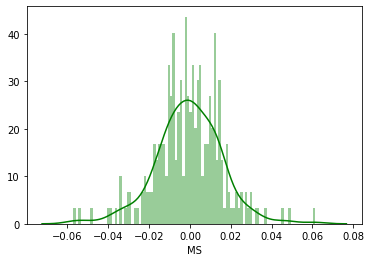

In [309]:
returns_close_2015 = returns_close[returns_close.index.year == 2015]
sns.distplot(returns_close_2015.xs(axis = 1, key = 'MS'),bins = 100, color = 'g')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



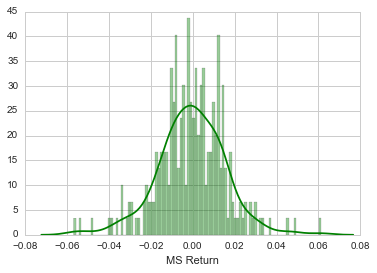

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

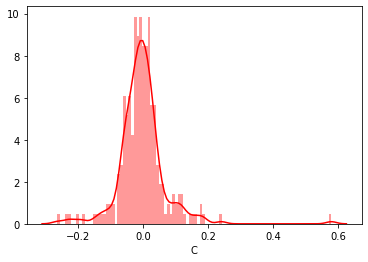

In [313]:
sns.distplot(returns_close[returns_close.index.year == 2008 ].xs(axis = 1, key = 'C') , color = 'r', bins = 100)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



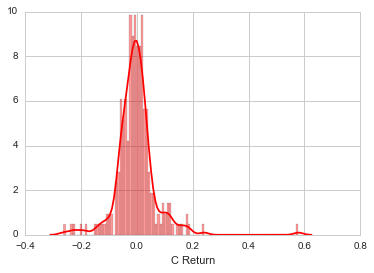

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [356]:
dt

Symbols           BAC           C          GS        JPM         MS        WFC
Date                                                                          
2006-01-03  47.080002  492.899994  128.869995  40.189999  58.310001  31.900000
2006-01-04  46.580002  483.799988  127.089996  39.619999  58.349998  31.530001
2006-01-05  46.639999  486.200012  127.040001  39.740002  58.509998  31.495001
2006-01-06  46.570000  486.200012  128.839996  40.020000  58.570000  31.680000
2006-01-09  46.599998  483.899994  130.389999  40.669998  59.189999  31.674999
...               ...         ...         ...        ...        ...        ...
2015-12-24  17.270000   52.709999  182.470001  66.599998  32.480000  54.820000
2015-12-28  17.129999   52.380001  181.619995  66.379997  32.169998  54.680000
2015-12-29  17.280001   52.980000  183.529999  67.070000  32.549999  55.290001
2015-12-30  17.049999   52.299999  182.009995  66.589996  32.230000  54.889999
2015-12-31  16.830000   51.750000  180.229996  66.029999  31.809999  54.360001

[2517 rows x 6 columns]

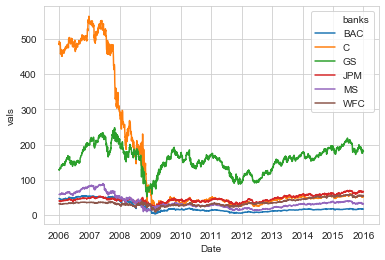

In [397]:
dt = df.xs(axis = 1, key = 'Close').reset_index()
dt = dt.melt('Date', var_name='banks',  value_name='vals')
sns.lineplot(data = dt, x = 'Date', y = 'vals', hue = 'banks')

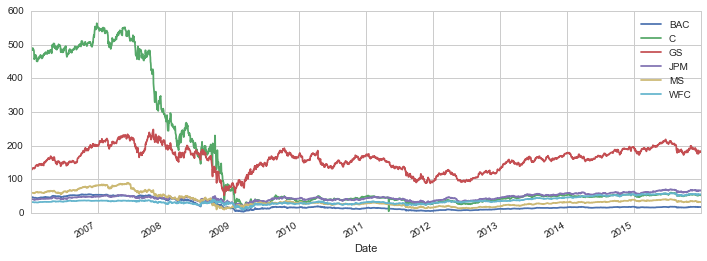

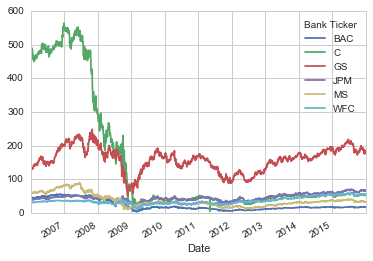

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

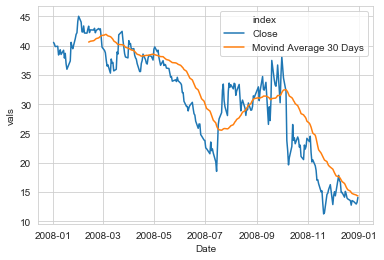

In [487]:
dt = df[df.index.year == 2008].xs(axis = 1, key = 'Close').xs(axis = 1, key = 'BAC')
dm = dt.rolling(window = 30).mean()
dt = pd.concat([dt,dm], axis = 1,).reset_index()
dt.columns = ['Date' , 'Close',"Movind Average 30 Days"]

dt = dt.melt('Date', var_name='index',  value_name='vals')
sns.lineplot(data = dt, x = 'Date', y = 'vals', hue = 'index')

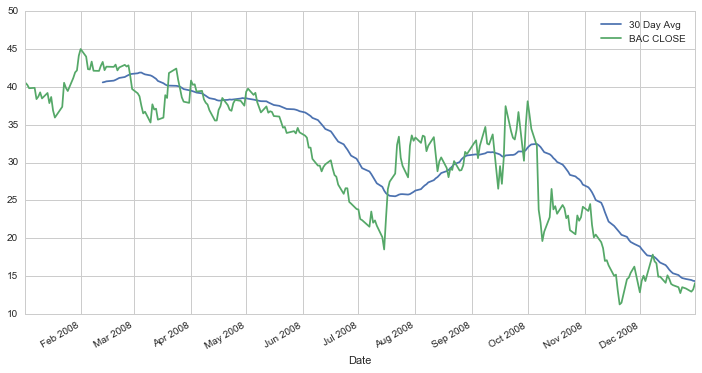

** Create a heatmap of the correlation between the stocks Close Price.**

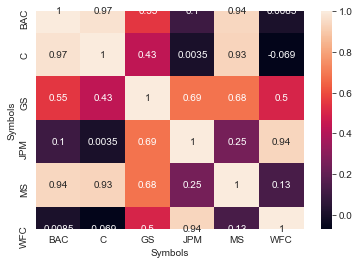

In [497]:
sns.heatmap(df.Close.corr(),annot=True)

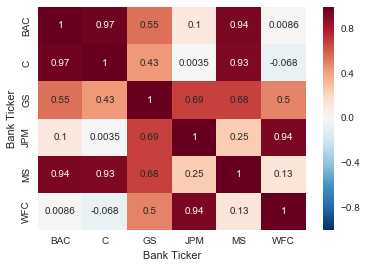

** Optional: Use seaborn's clustermap to cluster the correlations together:**

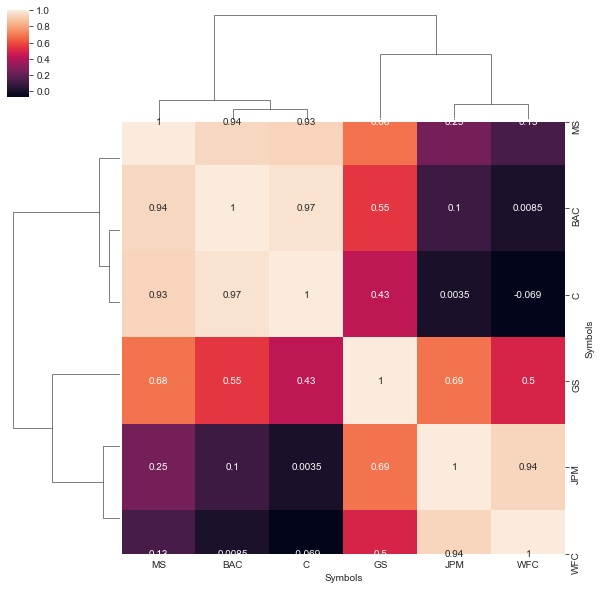

In [498]:
sns.clustermap(df.Close.corr(),annot=True)

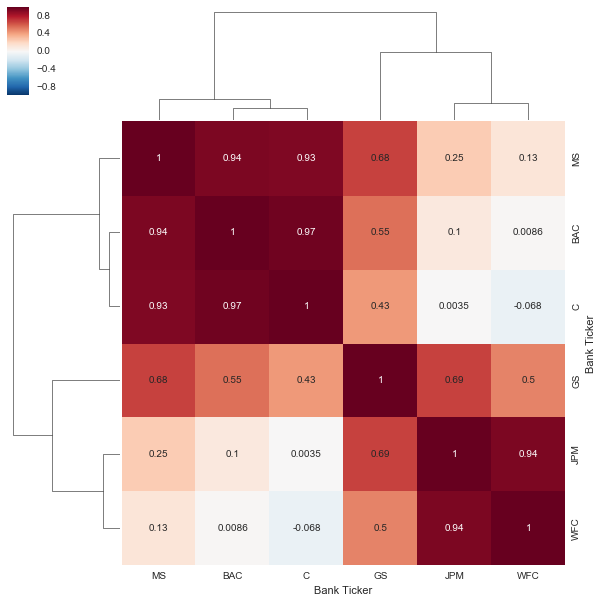

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.